<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/pycaret%20low%20code%20tasks/timeseries_without%20exogeneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
from pycaret.time_series import *
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/PJME_hourly.csv', index_col='Datetime', parse_dates=True)

In [9]:
pip install pycaret-ts-alpha


INFO: pip is looking at multiple versions of pycaret-ts-alpha to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [13]:
data = data.resample('D').mean()

In [14]:
# Initialize setup for univariate forecasting
data = data.asfreq('H')  # Assuming the data is hourly. Adjust 'H' if it's another frequency (e.g., 'D' for daily)

# Check if there are any missing timestamps, and fill them if needed
data = data.fillna(method='ffill')  # Forward fill to handle missing values

# Initialize setup for univariate forecasting
exp_ts = setup(data, target='PJME_MW', session_id=123)


,Description,Value
0,session_id,123
1,Target,PJME_MW
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(145393, 1)"
5,Transformed data shape,"(145393, 1)"
6,Transformed train set shape,"(145392, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [18]:
subset_data = data[-(365*2):]

In [20]:
# Create ARIMA model
ets = create_model('ets')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2018-08-02 20:00,0.0045,0.0034,8.3629,8.3629,0.0002,0.0002
1,2018-08-02 21:00,0.0045,0.0034,8.4042,8.4042,0.0002,0.0002
2,2018-08-02 22:00,0.0045,0.0034,8.4686,8.4686,0.0002,0.0002
Mean,NaT,0.0045,0.0034,8.4119,8.4119,0.0002,0.0002
SD,NaT,0.0000,0.0000,0.0435,0.0435,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

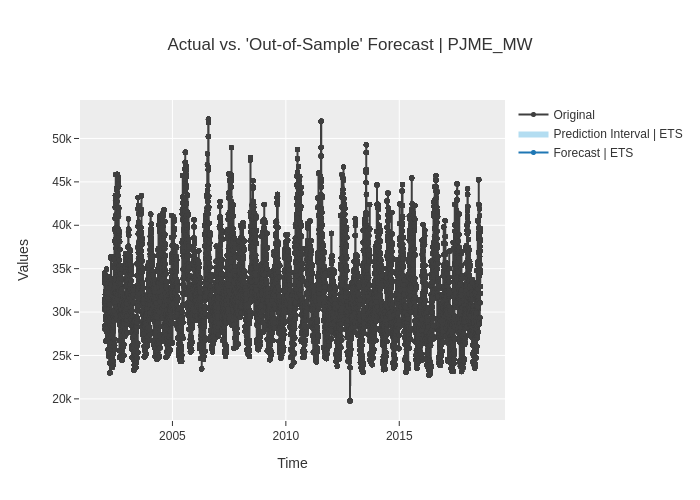

In [21]:
plot_model(ets, plot='forecast')